In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reward(timestep, valid_loss, eps = 1e-8):
    r_1 = (-np.log(timestep / 100) + (3 - valid_loss))
    return r_1

In [3]:
def jaksim_reward(timestep, valid_loss, alpha, max_epochs):
    jaksim_value = 1 / (1 + np.exp((timestep - max_epochs * 0.3) / (max_epochs * 0.05)))
    loss_value = 3 - valid_loss
    
    return alpha * jaksim_value + loss_value

In [4]:
jaksim = lambda x, max_epochs: 1 / (1 + np.exp((x - max_epochs * 0.3) / (max_epochs * 0.05)))
# jaksim = lambda x, _: 1 / (1 + np.exp((x - 30) / 5))

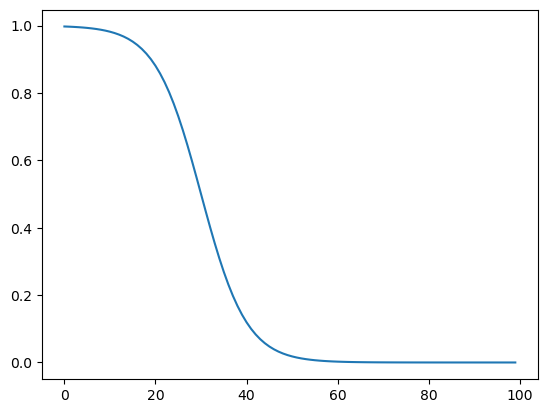

In [5]:
plt.plot([jaksim(value, 100) for value in range(100)])

In [6]:
def reward_v2(timestep, valid_loss, eps = 1e-8):
    # r_1 = (-np.log(timestep + eps) * (1 - valid_loss))
    # r_1 = - (1 / 2) ** (timestep + 1 + eps) + (3 - valid_loss)
    r_1 = 1.01 ** (100 - timestep) + (8 - valid_loss) * 30
    return r_1

In [7]:
def final_reward(loss, lam = 4):
    reward_list = list()
    for timestep in range(len(loss)):
        reward_list.append((loss[0] - loss[timestep]) / ((timestep + 1) ** (1 / lam)))
    return reward_list

In [8]:
def valoss(timestep, eps = 1e-8):
    return max(-np.log(timestep / 3 + eps), -3) + 0.5 + np.random.randint(-20, 20) / 15

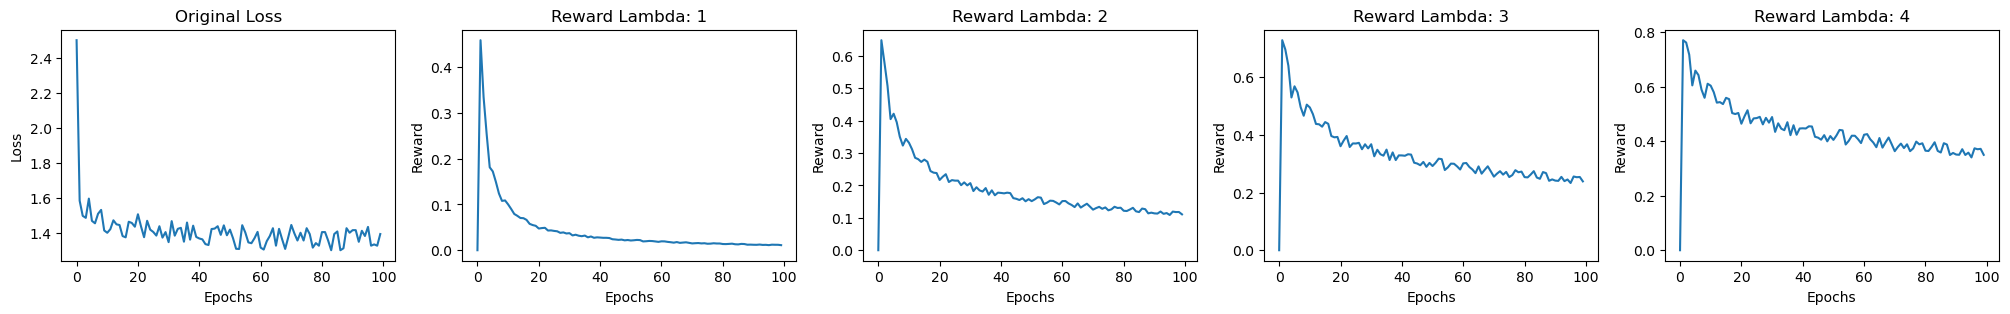

In [13]:
loss_list = list()
for i in range(100):
    loss_list.append(valoss(i))
loss_list = np.array(loss_list)
loss_list = (loss_list - loss_list.min()) / (loss_list.max() - loss_list.min())
loss_list = loss_list * (2.5 - 1.3) + 1.3

plt.figure(figsize = (25, 3))

plt.subplot(1, 5, 1)
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Original Loss')

for i in range(1, 5):
    plt.subplot(1, 5, i + 1)
    plt.plot(final_reward(loss_list, i))
    plt.xlabel('Epochs')
    plt.ylabel('Reward')
    plt.title(f'Reward Lambda: {i}')

plt.show()

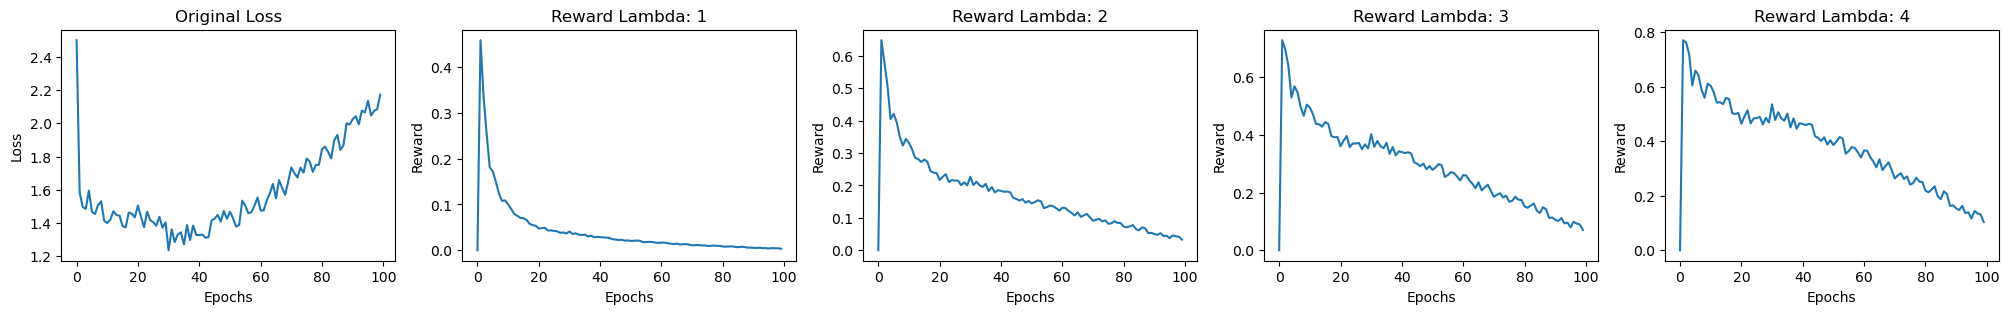

In [21]:
bad_loss = loss_list.copy()
for idx in range(30, len(bad_loss)):
    bad_loss[idx] = bad_loss[idx] + ((idx ** 2) / 10000) - 0.2

plt.figure(figsize = (25, 3))

plt.subplot(1, 5, 1)
plt.plot(bad_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Original Loss')

for i in range(1, 5):
    plt.subplot(1, 5, i + 1)
    plt.plot(final_reward(bad_loss, i))
    plt.xlabel('Epochs')
    plt.ylabel('Reward')
    plt.title(f'Reward Lambda: {i}')

plt.show()

In [11]:
reward_list = list()
for idx, loss in enumerate(bad_loss):
    reward_list.append(jaksim_reward(idx, loss, 1.0, 100))
plt.plot(reward_list)
plt.show()

In [12]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)

loss_list = list()
for i in range(100):
    loss_list.append(valoss(i))
loss_list = np.array(loss_list)
loss_list = loss_list / (loss_list.max() / 2)
plt.plot(loss_list)

plt.subplot(1, 2, 2)
reward_list = list()
for idx, loss in enumerate(loss_list):
    reward_list.append(reward(idx, loss))
plt.plot(reward_list)
plt.show()

In [16]:
new_loss = np.array(loss_list)

In [17]:
plt.plot(new_loss)

In [23]:
plt.plot((1 - new_loss) / (new_loss))

In [19]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.plot(1 - new_loss)
plt.subplot(1, 2, 2)
plt.plot(new_loss)

In [48]:
import math

good_rewards = list()
for timestep in range(100):
    r_1 = (new_loss[0] - new_loss[timestep]) / ((timestep + 1) ** (1 / 4))
    good_rewards.append(r_1)
plt.plot(good_rewards)

In [49]:
bad_rewards = list()
for timestep in range(100):
    r_1 = (bad_loss[0] - bad_loss[timestep]) / ((timestep + 1) ** (1 / 4))
    bad_rewards.append(r_1)

plt.plot(bad_rewards)

In [50]:
plt.plot(good_rewards)
plt.plot(bad_rewards)

In [27]:
old_rewards = list()
for timestep in range(100):
    r_1 = (new_loss[0] - new_loss[timestep]) / (timestep + 1)
    r_2 = new_loss[-1] - new_loss[max(0, timestep - 5)]
    old_rewards.append(r_1 + 0.1 * r_2)

In [28]:
plt.plot(old_rewards)

In [29]:
old_rewards = list()
for timestep in range(100):
    r_1 = (bad_loss[0] - bad_loss[timestep]) / (timestep + 1)
    r_2 = bad_loss[-1] - bad_loss[max(0, timestep - 5)]
    old_rewards.append(r_1 + 0.1 * r_2)

In [30]:
plt.plot(old_rewards)